In [1]:
import pandas as pd
from sklearn import datasets # sklearn comes with some toy datasets to practise
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


Now it's time to cluster the songs of the hot_songs and not_hot_songs databases according to the song's audio features. You will need to consider the following:

Are you going to use all the audio features? If not, which ones do you think to make more sense? What is the optimal number of clusters (for methods that need to know this beforehand)? What is the best distance to use? What clustering method provides better results? Does the clustering method need a transformer? Be aware that this process is extremely time-consuming!!! Therefore, when testing different options, save the models into your disk in order to be able to use the best model later. You don't want to retrain the best model again when you know what are the optimal parameters for each.

Add to the hot_songs and not_hot_songs databases a new column for each clustering method with the cluster membership of each song for each method.

In [2]:
pd.set_option('display.max_columns', None)

## Importing the datasets and concatenating


In [3]:
billboard100_final = pd.read_csv('billboard100_final.csv')

In [4]:
billboard100_final.head()

,song_id,title,artist,dataset,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature
0,4LRPiXqCikLlN15c3yImP7,As It Was,Harry Styles,H,0.520,0.731,6,-5.338,0,0.0557,0.3420,0.001010,0.3110,0.662,173.930,audio_features,spotify:track:4LRPiXqCikLlN15c3yImP7,https://api.spotify.com/v1/tracks/4LRPiXqCikLl...,https://api.spotify.com/v1/audio-analysis/4LRP...,167303,4
1,1rDQ4oMwGJI7B4tovsBOxc,First Class,Jack Harlow,H,0.905,0.563,8,-6.135,1,0.1020,0.0254,0.000010,0.1130,0.324,106.998,audio_features,spotify:track:1rDQ4oMwGJI7B4tovsBOxc,https://api.spotify.com/v1/tracks/1rDQ4oMwGJI7...,https://api.spotify.com/v1/audio-analysis/1rDQ...,173948,4
2,1PckUlxKqWQs3RlWXVBLw3,About Damn Time,Lizzo,H,0.836,0.743,10,-6.305,0,0.0656,0.0995,0.000000,0.3350,0.722,108.966,audio_features,spotify:track:1PckUlxKqWQs3RlWXVBLw3,https://api.spotify.com/v1/tracks/1PckUlxKqWQs...,https://api.spotify.com/v1/audio-analysis/1Pck...,191822,4
3,3USxtqRwSYz57Ewm6wWRMp,Heat Waves,Glass Animals,H,0.761,0.525,11,-6.900,1,0.0944,0.4400,0.000007,0.0921,0.531,80.870,audio_features,spotify:track:3USxtqRwSYz57Ewm6wWRMp,https://api.spotify.com/v1/tracks/3USxtqRwSYz5...,https://api.spotify.com/v1/audio-analysis/3USx...,238805,4
4,6Zu3aw7FfjAF9WA0fA81Oq,Big Energy,Latto,H,0.935,0.807,11,-3.838,0,0.1140,0.0514,0.000000,0.3490,0.813,106.017,audio_features,spotify:track:6Zu3aw7FfjAF9WA0fA81Oq,https://api.spotify.com/v1/tracks/6Zu3aw7FfjAF...,https://api.spotify.com/v1/audio-analysis/6Zu3...,173182,4


In [5]:
billboard100_final.shape


(75, 21)

In [6]:
nothotsongs_final = pd.read_csv('nothotsongs_final.csv')

In [7]:
X = pd.concat([billboard100_final, nothotsongs_final], axis=0)

In [8]:
X.head()

,song_id,title,artist,dataset,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature
0,4LRPiXqCikLlN15c3yImP7,As It Was,Harry Styles,H,0.520,0.731,6,-5.338,0,0.0557,0.3420,0.001010,0.3110,0.662,173.930,audio_features,spotify:track:4LRPiXqCikLlN15c3yImP7,https://api.spotify.com/v1/tracks/4LRPiXqCikLl...,https://api.spotify.com/v1/audio-analysis/4LRP...,167303,4
1,1rDQ4oMwGJI7B4tovsBOxc,First Class,Jack Harlow,H,0.905,0.563,8,-6.135,1,0.1020,0.0254,0.000010,0.1130,0.324,106.998,audio_features,spotify:track:1rDQ4oMwGJI7B4tovsBOxc,https://api.spotify.com/v1/tracks/1rDQ4oMwGJI7...,https://api.spotify.com/v1/audio-analysis/1rDQ...,173948,4
2,1PckUlxKqWQs3RlWXVBLw3,About Damn Time,Lizzo,H,0.836,0.743,10,-6.305,0,0.0656,0.0995,0.000000,0.3350,0.722,108.966,audio_features,spotify:track:1PckUlxKqWQs3RlWXVBLw3,https://api.spotify.com/v1/tracks/1PckUlxKqWQs...,https://api.spotify.com/v1/audio-analysis/1Pck...,191822,4
3,3USxtqRwSYz57Ewm6wWRMp,Heat Waves,Glass Animals,H,0.761,0.525,11,-6.900,1,0.0944,0.4400,0.000007,0.0921,0.531,80.870,audio_features,spotify:track:3USxtqRwSYz57Ewm6wWRMp,https://api.spotify.com/v1/tracks/3USxtqRwSYz5...,https://api.spotify.com/v1/audio-analysis/3USx...,238805,4
4,6Zu3aw7FfjAF9WA0fA81Oq,Big Energy,Latto,H,0.935,0.807,11,-3.838,0,0.1140,0.0514,0.000000,0.3490,0.813,106.017,audio_features,spotify:track:6Zu3aw7FfjAF9WA0fA81Oq,https://api.spotify.com/v1/tracks/6Zu3aw7FfjAF...,https://api.spotify.com/v1/audio-analysis/6Zu3...,173182,4


In [9]:
X.shape

(1948, 21)

## Dropping unnecessary columns

In [10]:
#X.drop(columns=['song_id','title', 'artist', 'dataset','type', 'uri', 'track_href', 'analysis_url', 'time_signature'], axis=1, inplace=True)

In [13]:
X.head()

,song_id,title,artist,dataset,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature
0,4LRPiXqCikLlN15c3yImP7,As It Was,Harry Styles,H,0.520,0.731,6,-5.338,0,0.0557,0.3420,0.001010,0.3110,0.662,173.930,audio_features,spotify:track:4LRPiXqCikLlN15c3yImP7,https://api.spotify.com/v1/tracks/4LRPiXqCikLl...,https://api.spotify.com/v1/audio-analysis/4LRP...,167303,4
1,1rDQ4oMwGJI7B4tovsBOxc,First Class,Jack Harlow,H,0.905,0.563,8,-6.135,1,0.1020,0.0254,0.000010,0.1130,0.324,106.998,audio_features,spotify:track:1rDQ4oMwGJI7B4tovsBOxc,https://api.spotify.com/v1/tracks/1rDQ4oMwGJI7...,https://api.spotify.com/v1/audio-analysis/1rDQ...,173948,4
2,1PckUlxKqWQs3RlWXVBLw3,About Damn Time,Lizzo,H,0.836,0.743,10,-6.305,0,0.0656,0.0995,0.000000,0.3350,0.722,108.966,audio_features,spotify:track:1PckUlxKqWQs3RlWXVBLw3,https://api.spotify.com/v1/tracks/1PckUlxKqWQs...,https://api.spotify.com/v1/audio-analysis/1Pck...,191822,4
3,3USxtqRwSYz57Ewm6wWRMp,Heat Waves,Glass Animals,H,0.761,0.525,11,-6.900,1,0.0944,0.4400,0.000007,0.0921,0.531,80.870,audio_features,spotify:track:3USxtqRwSYz57Ewm6wWRMp,https://api.spotify.com/v1/tracks/3USxtqRwSYz5...,https://api.spotify.com/v1/audio-analysis/3USx...,238805,4
4,6Zu3aw7FfjAF9WA0fA81Oq,Big Energy,Latto,H,0.935,0.807,11,-3.838,0,0.1140,0.0514,0.000000,0.3490,0.813,106.017,audio_features,spotify:track:6Zu3aw7FfjAF9WA0fA81Oq,https://api.spotify.com/v1/tracks/6Zu3aw7FfjAF...,https://api.spotify.com/v1/audio-analysis/6Zu3...,173182,4


## Scaling features

In [11]:
features_clustering= ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms','time_signature']

In [14]:
X[features_clustering]

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.520,0.731,6,-5.338,0,0.0557,0.3420,0.001010,0.3110,0.662,173.930,167303,4
1,0.905,0.563,8,-6.135,1,0.1020,0.0254,0.000010,0.1130,0.324,106.998,173948,4
2,0.836,0.743,10,-6.305,0,0.0656,0.0995,0.000000,0.3350,0.722,108.966,191822,4
3,0.761,0.525,11,-6.900,1,0.0944,0.4400,0.000007,0.0921,0.531,80.870,238805,4
4,0.935,0.807,11,-3.838,0,0.1140,0.0514,0.000000,0.3490,0.813,106.017,173182,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1868,0.695,0.295,9,-8.672,1,0.0609,0.8430,0.000002,0.0856,0.732,93.574,127960,4
1869,0.494,0.756,0,-8.492,1,0.0499,0.7330,0.005050,0.7600,0.949,86.895,136027,4
1870,0.534,0.803,10,-9.129,1,0.0743,0.7410,0.000061,0.3070,0.969,167.983,161560,4
1871,0.454,0.260,8,-13.193,0,0.0401,0.5390,0.000780,0.0675,0.598,174.322,324133,5


In [24]:
!ls scalers/

scaler.pickle


In [22]:
import pickle
import os

scaler = StandardScaler()
scaler.fit(X[features_clustering])
X_scaled = scaler.transform(X[features_clustering])

if ( os.path.isdir("scalers") == False ):
    os.mkdir("scalers")

filename = r"C:\Users\31612\Documents\IRONHACK\6Week_six\lab-web-scraping-single-page\scalers\scaler.pickle" # Path with filename

with open(filename, "wb") as file:
        pickle.dump(scaler,file)

X_scaled_df = pd.DataFrame(X_scaled, columns = X[features_clustering].columns)
display(X.head())
print()
display(X_scaled_df.head())

,song_id,title,artist,dataset,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature
0,4LRPiXqCikLlN15c3yImP7,As It Was,Harry Styles,H,0.520,0.731,6,-5.338,0,0.0557,0.3420,0.001010,0.3110,0.662,173.930,audio_features,spotify:track:4LRPiXqCikLlN15c3yImP7,https://api.spotify.com/v1/tracks/4LRPiXqCikLl...,https://api.spotify.com/v1/audio-analysis/4LRP...,167303,4
1,1rDQ4oMwGJI7B4tovsBOxc,First Class,Jack Harlow,H,0.905,0.563,8,-6.135,1,0.1020,0.0254,0.000010,0.1130,0.324,106.998,audio_features,spotify:track:1rDQ4oMwGJI7B4tovsBOxc,https://api.spotify.com/v1/tracks/1rDQ4oMwGJI7...,https://api.spotify.com/v1/audio-analysis/1rDQ...,173948,4
2,1PckUlxKqWQs3RlWXVBLw3,About Damn Time,Lizzo,H,0.836,0.743,10,-6.305,0,0.0656,0.0995,0.000000,0.3350,0.722,108.966,audio_features,spotify:track:1PckUlxKqWQs3RlWXVBLw3,https://api.spotify.com/v1/tracks/1PckUlxKqWQs...,https://api.spotify.com/v1/audio-analysis/1Pck...,191822,4
3,3USxtqRwSYz57Ewm6wWRMp,Heat Waves,Glass Animals,H,0.761,0.525,11,-6.900,1,0.0944,0.4400,0.000007,0.0921,0.531,80.870,audio_features,spotify:track:3USxtqRwSYz57Ewm6wWRMp,https://api.spotify.com/v1/tracks/3USxtqRwSYz5...,https://api.spotify.com/v1/audio-analysis/3USx...,238805,4
4,6Zu3aw7FfjAF9WA0fA81Oq,Big Energy,Latto,H,0.935,0.807,11,-3.838,0,0.1140,0.0514,0.000000,0.3490,0.813,106.017,audio_features,spotify:track:6Zu3aw7FfjAF9WA0fA81Oq,https://api.spotify.com/v1/tracks/6Zu3aw7FfjAF...,https://api.spotify.com/v1/audio-analysis/6Zu3...,173182,4


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,-0.122703,0.604195,0.238419,0.986674,-1.530143,0.067149,0.177962,-0.321099,0.675804,0.685044,1.904610,-0.996591,0.227694
1,2.318659,-0.159188,0.808633,0.769488,0.653534,0.975761,-0.909577,-0.327323,-0.462071,-0.674997,-0.471792,-0.925735,0.227694
2,1.881116,0.658722,1.378847,0.723162,-1.530143,0.261431,-0.655039,-0.327383,0.813728,0.926471,-0.401919,-0.735145,0.227694
3,1.405526,-0.331858,1.663954,0.561022,0.653534,0.826616,0.514597,-0.327342,-0.582180,0.157927,-1.399460,-0.234165,0.227694
4,2.508895,0.949535,1.663954,1.395430,-1.530143,1.211255,-0.820265,-0.327383,0.894184,1.292636,-0.506623,-0.933903,0.227694


In [25]:
X_scaled_df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,1.948000e+03,1.948000e+03,1.948000e+03,1.948000e+03,1.948000e+03,1.948000e+03,1.948000e+03,1.948000e+03,1.948000e+03,1.948000e+03,1.948000e+03,1.948000e+03,1.948000e+03
mean,6.554191e-19,-3.096428e-16,2.440439e-16,1.835886e-16,-1.296704e-15,1.567307e-18,-1.918383e-16,8.329522e-17,-4.389883e-17,-2.416502e-16,-6.714057e-16,-6.143842e-17,-5.300346e-16
std,1.000257e+00,1.000257e+00,1.000257e+00,1.000257e+00,1.000257e+00,1.000257e+00,1.000257e+00,1.000257e+00,1.000257e+00,1.000257e+00,1.000257e+00,1.000257e+00,1.000257e+00
min,-2.766983e+00,-2.674673e+00,-1.472224e+00,-7.131224e+00,-1.530143e+00,-5.843825e-01,-9.968107e-01,-3.273835e-01,-9.821602e-01,-1.857992e+00,-2.999196e+00,-2.103945e+00,-8.194104e+00
25%,-6.934107e-01,-7.601255e-01,-9.020096e-01,-5.479333e-01,-1.530143e+00,-4.214996e-01,-8.800351e-01,-3.273771e-01,-5.805995e-01,-8.238775e-01,-7.444509e-01,-5.345230e-01,2.276941e-01
50%,1.046233e-02,9.300069e-02,-4.668847e-02,1.474972e-01,6.535336e-01,-3.037529e-01,-3.647768e-01,-3.267332e-01,-3.988556e-01,-8.148816e-02,-4.765297e-02,-1.840965e-01,2.276941e-01
75%,6.953118e-01,8.132164e-01,8.086326e-01,7.410793e-01,6.535336e-01,-3.882277e-02,7.103954e-01,-2.958673e-01,2.218033e-01,8.027398e-01,5.637029e-01,2.990017e-01,2.276941e-01
max,2.642060e+00,1.803797e+00,1.663954e+00,2.022189e+00,6.535336e-01,1.016000e+01,2.407313e+00,5.814066e+00,4.595150e+00,1.984728e+00,3.158956e+00,1.386583e+01,3.034960e+00


## Clustering the songs with K-Means

## Chosing K with elbow  and silhouette methods

Training a K-Means model with 2 clusters! 

Initialization complete
Iteration 0, inertia 28753.494758661353
Iteration 1, inertia 23404.14530631492
Iteration 2, inertia 22671.089071192804
Iteration 3, inertia 21976.816670604174
Iteration 4, inertia 21769.56688156514
Iteration 5, inertia 21746.510080702046
Iteration 6, inertia 21743.13952487444
Iteration 7, inertia 21742.460304470304
Converged at iteration 7: center shift 9.76018123874155e-05 within tolerance 9.999999999999984e-05.
Initialization complete
Iteration 0, inertia 34248.36906001272
Iteration 1, inertia 23719.744953728627
Iteration 2, inertia 23624.995899264606
Iteration 3, inertia 23539.33930131953
Iteration 4, inertia 23124.189226973034
Iteration 5, inertia 22251.804832988862
Iteration 6, inertia 21826.260169035155
Iteration 7, inertia 21748.537595108315
Iteration 8, inertia 21742.927491555274
Iteration 9, inertia 21742.40097540881
Iteration 10, inertia 21742.304760131403
Converged at iteration 10: strict convergence.
Initia

Iteration 0, inertia 26479.095140293197
Iteration 1, inertia 20025.37082540018
Iteration 2, inertia 19744.861494162164
Iteration 3, inertia 19661.58323543242
Iteration 4, inertia 19581.750406751882
Iteration 5, inertia 19400.75990360709
Iteration 6, inertia 19300.561741695034
Iteration 7, inertia 19263.47085031931
Iteration 8, inertia 19231.477883509895
Iteration 9, inertia 19164.12387622185
Iteration 10, inertia 19070.473595448693
Iteration 11, inertia 18988.52269269069
Iteration 12, inertia 18928.22477199371
Iteration 13, inertia 18903.64854515367
Iteration 14, inertia 18887.976965995014
Iteration 15, inertia 18880.483929084854
Iteration 16, inertia 18876.62252520319
Iteration 17, inertia 18873.792700934093
Iteration 18, inertia 18871.448108014534
Iteration 19, inertia 18867.709409769515
Iteration 20, inertia 18865.407892545514
Iteration 21, inertia 18864.01158653995
Iteration 22, inertia 18862.564213031263
Iteration 23, inertia 18861.533257825584
Iteration 24, inertia 18861.39214342


Initialization complete
Iteration 0, inertia 22415.900773720543
Iteration 1, inertia 18219.880120301612
Iteration 2, inertia 17558.543363390327
Iteration 3, inertia 17342.370497203116
Iteration 4, inertia 17253.894306667098
Iteration 5, inertia 17199.53431439155
Iteration 6, inertia 17150.979796589447
Iteration 7, inertia 17112.477275491365
Iteration 8, inertia 17093.916718024022
Iteration 9, inertia 17083.04711320096
Iteration 10, inertia 17075.8100399565
Iteration 11, inertia 17071.782472731575
Iteration 12, inertia 17069.708292324874
Iteration 13, inertia 17067.47270867996
Iteration 14, inertia 17065.67265176172
Iteration 15, inertia 17064.066110005806
Iteration 16, inertia 17063.001431389937
Iteration 17, inertia 17062.594257972214
Iteration 18, inertia 17062.333859737784
Iteration 19, inertia 17061.836339728045
Iteration 20, inertia 17061.08457288105
Iteration 21, inertia 17060.406004154916
Iteration 22, inertia 17059.749010169693
Iteration 23, inertia 17059.593067783233
Iteratio

Training a K-Means model with 7 clusters! 

Initialization complete
Iteration 0, inertia 21448.049803701848
Iteration 1, inertia 17070.39022129805
Iteration 2, inertia 16360.622093718426
Iteration 3, inertia 16152.489154207964
Iteration 4, inertia 16079.793574424322
Iteration 5, inertia 16037.404312905583
Iteration 6, inertia 16006.36921333209
Iteration 7, inertia 15978.67921276568
Iteration 8, inertia 15963.453314036287
Iteration 9, inertia 15952.12433522006
Iteration 10, inertia 15942.47081721093
Iteration 11, inertia 15935.122215844713
Iteration 12, inertia 15932.136272942897
Iteration 13, inertia 15929.370585469906
Iteration 14, inertia 15927.675038546171
Iteration 15, inertia 15927.18053760852
Iteration 16, inertia 15926.765916830873
Iteration 17, inertia 15926.436352190782
Iteration 18, inertia 15925.021393639734
Iteration 19, inertia 15924.646066820176
Iteration 20, inertia 15924.579086965565
Converged at iteration 20: center shift 7.523233366371691e-05 within tolerance 9.999999

Training a K-Means model with 8 clusters! 

Initialization complete
Iteration 0, inertia 20203.425837633953
Iteration 1, inertia 16205.586397372324
Iteration 2, inertia 15727.085088146305
Iteration 3, inertia 15497.880620998223
Iteration 4, inertia 15355.193661125206
Iteration 5, inertia 15305.460830936818
Iteration 6, inertia 15293.477482244645
Iteration 7, inertia 15284.243440630049
Iteration 8, inertia 15271.382044519692
Iteration 9, inertia 15247.475690611274
Iteration 10, inertia 15199.710480693844
Iteration 11, inertia 15124.692915710499
Iteration 12, inertia 15070.310125268603
Iteration 13, inertia 15060.281754816999
Iteration 14, inertia 15055.207746198677
Iteration 15, inertia 15053.14742001496
Iteration 16, inertia 15050.81423752036
Iteration 17, inertia 15048.460722864831
Iteration 18, inertia 15046.474967489945
Iteration 19, inertia 15043.77268680191
Iteration 20, inertia 15042.426262744993
Iteration 21, inertia 15041.239760916955
Iteration 22, inertia 15040.26942091224
Ite

Training a K-Means model with 9 clusters! 

Initialization complete
Iteration 0, inertia 19629.271072120304
Iteration 1, inertia 15806.539753284189
Iteration 2, inertia 15331.66753717122
Iteration 3, inertia 15159.996674814214
Iteration 4, inertia 14991.945569504567
Iteration 5, inertia 14842.205898241391
Iteration 6, inertia 14698.192630554857
Iteration 7, inertia 14606.780038660354
Iteration 8, inertia 14554.135244960997
Iteration 9, inertia 14519.175757330477
Iteration 10, inertia 14489.423936834995
Iteration 11, inertia 14476.044007326349
Iteration 12, inertia 14473.545857324147
Iteration 13, inertia 14472.939425921277
Iteration 14, inertia 14472.654380882019
Iteration 15, inertia 14471.950980035235
Iteration 16, inertia 14471.605298084629
Iteration 17, inertia 14471.382030152381
Iteration 18, inertia 14471.201956131974
Iteration 19, inertia 14470.654584003423
Iteration 20, inertia 14470.236357561671
Iteration 21, inertia 14469.916032335363
Iteration 22, inertia 14469.565367290917


Initialization complete
Iteration 0, inertia 19863.610506648114
Iteration 1, inertia 16435.936699110873
Iteration 2, inertia 16008.790082800799
Iteration 3, inertia 15890.242601271626
Iteration 4, inertia 15799.57724151263
Iteration 5, inertia 15671.562707653966
Iteration 6, inertia 15361.082768672912
Iteration 7, inertia 15191.125603754488
Iteration 8, inertia 15132.5536938562
Iteration 9, inertia 15114.208221613373
Iteration 10, inertia 15108.230182063107
Iteration 11, inertia 15101.98385561931
Iteration 12, inertia 15099.739894656359
Iteration 13, inertia 15097.56056323093
Iteration 14, inertia 15095.624325784036
Iteration 15, inertia 15095.103629028677
Iteration 16, inertia 15094.863278148196
Iteration 17, inertia 15094.636844571629
Iteration 18, inertia 15094.348217272622
Iteration 19, inertia 15094.216177995811
Iteration 20, inertia 15094.13965279772
Iteration 21, inertia 15094.00311076352
Converged at iteration 21: strict convergence.
Initialization complete
Iteration 0, inertia

Iteration 53, inertia 13733.18327138181
Iteration 54, inertia 13731.555545983922
Iteration 55, inertia 13731.031001011534
Iteration 56, inertia 13730.71614863066
Iteration 57, inertia 13730.49641758085
Converged at iteration 57: strict convergence.
Initialization complete
Iteration 0, inertia 19478.382666171812
Iteration 1, inertia 14784.027792183177
Iteration 2, inertia 14158.842382897692
Iteration 3, inertia 13994.28458093536
Iteration 4, inertia 13915.596051374978
Iteration 5, inertia 13880.53704586576
Iteration 6, inertia 13854.834963740552
Iteration 7, inertia 13847.135412675052
Iteration 8, inertia 13842.901953358887
Iteration 9, inertia 13839.421608041463
Iteration 10, inertia 13837.488210761163
Iteration 11, inertia 13836.758873798994
Iteration 12, inertia 13833.082160145037
Iteration 13, inertia 13823.799014613545
Iteration 14, inertia 13812.49910405972
Iteration 15, inertia 13803.535794948037
Iteration 16, inertia 13795.400883549859
Iteration 17, inertia 13790.584521277158
It

Iteration 15, inertia 13401.6329800341
Iteration 16, inertia 13400.64612665717
Iteration 17, inertia 13399.6726654491
Iteration 18, inertia 13398.753976015814
Iteration 19, inertia 13397.437655534539
Iteration 20, inertia 13396.000034455588
Iteration 21, inertia 13394.618152868708
Iteration 22, inertia 13393.42710994523
Iteration 23, inertia 13392.303829204768
Iteration 24, inertia 13391.689742510942
Iteration 25, inertia 13391.390771737228
Iteration 26, inertia 13391.02529507793
Iteration 27, inertia 13390.576406092538
Iteration 28, inertia 13389.800363939516
Iteration 29, inertia 13388.540342927465
Iteration 30, inertia 13387.743018352938
Iteration 31, inertia 13386.191597366967
Iteration 32, inertia 13381.68650712647
Iteration 33, inertia 13369.611532659124
Iteration 34, inertia 13356.76500775149
Iteration 35, inertia 13351.786205644843
Iteration 36, inertia 13350.791914208867
Iteration 37, inertia 13350.367232059538
Iteration 38, inertia 13350.037438439209
Iteration 39, inertia 133

Training a K-Means model with 13 clusters! 

Initialization complete
Iteration 0, inertia 17526.545185932846
Iteration 1, inertia 13711.949300780607
Iteration 2, inertia 13141.486604882968
Iteration 3, inertia 12995.32892393903
Iteration 4, inertia 12948.567224824641
Iteration 5, inertia 12930.52834703145
Iteration 6, inertia 12925.744573149695
Iteration 7, inertia 12922.645106650743
Iteration 8, inertia 12921.544689808934
Iteration 9, inertia 12921.275906242267
Iteration 10, inertia 12920.821364471303
Iteration 11, inertia 12919.984362550797
Iteration 12, inertia 12918.02498539499
Iteration 13, inertia 12915.642445849693
Iteration 14, inertia 12914.152489494363
Iteration 15, inertia 12913.88380167466
Converged at iteration 15: strict convergence.
Initialization complete
Iteration 0, inertia 18406.00691798475
Iteration 1, inertia 14272.958560073605
Iteration 2, inertia 13812.571053603664
Iteration 3, inertia 13588.178360628544
Iteration 4, inertia 13376.315090150807
Iteration 5, inerti

Iteration 35, inertia 12823.85758209279
Iteration 36, inertia 12822.953873946666
Iteration 37, inertia 12822.66374758316
Iteration 38, inertia 12822.586594992843
Iteration 39, inertia 12822.51031880691
Converged at iteration 39: strict convergence.
Training a K-Means model with 14 clusters! 

Initialization complete
Iteration 0, inertia 17098.23428127009
Iteration 1, inertia 13457.457889605352
Iteration 2, inertia 12979.725535550986
Iteration 3, inertia 12834.860990768822
Iteration 4, inertia 12776.280854747909
Iteration 5, inertia 12765.076679433905
Iteration 6, inertia 12759.99360575361
Iteration 7, inertia 12758.491616991014
Iteration 8, inertia 12755.703260920774
Iteration 9, inertia 12748.998808168964
Iteration 10, inertia 12744.867809178755
Iteration 11, inertia 12740.075287650452
Iteration 12, inertia 12732.56347794217
Iteration 13, inertia 12724.840871710767
Iteration 14, inertia 12718.060228407723
Iteration 15, inertia 12713.251501456285
Iteration 16, inertia 12711.82299254169

Initialization complete
Iteration 0, inertia 16592.971566275224
Iteration 1, inertia 13165.876999950884
Iteration 2, inertia 12696.659655927564
Iteration 3, inertia 12558.649375096622
Iteration 4, inertia 12505.80890123703
Iteration 5, inertia 12471.186127276698
Iteration 6, inertia 12448.664936768395
Iteration 7, inertia 12422.473594815303
Iteration 8, inertia 12398.643214010172
Iteration 9, inertia 12358.345700389007
Iteration 10, inertia 12309.777094930992
Iteration 11, inertia 12273.74067763945
Iteration 12, inertia 12258.718768445058
Iteration 13, inertia 12252.567176672741
Iteration 14, inertia 12248.607067074357
Iteration 15, inertia 12246.802021042744
Iteration 16, inertia 12245.866098187178
Iteration 17, inertia 12244.885620050103
Iteration 18, inertia 12243.830730159296
Iteration 19, inertia 12243.026413634418
Iteration 20, inertia 12242.40348187396
Iteration 21, inertia 12241.95287589761
Iteration 22, inertia 12241.747297391503
Iteration 23, inertia 12241.636256600843
Iterat

Iteration 24, inertia 12197.075244214364
Iteration 25, inertia 12196.709631110283
Converged at iteration 25: strict convergence.
Initialization complete
Iteration 0, inertia 17354.40208428084
Iteration 1, inertia 13669.853129816092
Iteration 2, inertia 12882.398492992761
Iteration 3, inertia 12617.694531200941
Iteration 4, inertia 12506.197256983969
Iteration 5, inertia 12432.394088869976
Iteration 6, inertia 12386.171876708446
Iteration 7, inertia 12350.3092286024
Iteration 8, inertia 12331.724369832711
Iteration 9, inertia 12318.591571519242
Iteration 10, inertia 12311.918334348296
Iteration 11, inertia 12304.95909276044
Iteration 12, inertia 12299.537494246273
Iteration 13, inertia 12296.33025008713
Iteration 14, inertia 12294.290593324502
Iteration 15, inertia 12293.079132554738
Iteration 16, inertia 12291.895947252944
Iteration 17, inertia 12290.37219604434
Iteration 18, inertia 12287.482378000423
Iteration 19, inertia 12283.193122838651
Iteration 20, inertia 12282.010522903322
It

Iteration 41, inertia 11890.47945185242
Iteration 42, inertia 11890.03608900234
Iteration 43, inertia 11889.722091857713
Iteration 44, inertia 11889.619290567396
Converged at iteration 44: strict convergence.
Initialization complete
Iteration 0, inertia 17580.87194009198
Iteration 1, inertia 13541.338618306627
Iteration 2, inertia 13098.478667426665
Iteration 3, inertia 12865.046472485064
Iteration 4, inertia 12687.274182332469
Iteration 5, inertia 12456.651460912017
Iteration 6, inertia 12270.762967621326
Iteration 7, inertia 12185.904170115675
Iteration 8, inertia 12148.374553288686
Iteration 9, inertia 12126.801589544822
Iteration 10, inertia 12118.35561319796
Iteration 11, inertia 12112.792983555424
Iteration 12, inertia 12109.410906824094
Iteration 13, inertia 12106.69753265397
Iteration 14, inertia 12105.009523181669
Iteration 15, inertia 12104.049226615916
Iteration 16, inertia 12103.292449579016
Iteration 17, inertia 12102.100589290056
Iteration 18, inertia 12101.215560797433
I

Iteration 27, inertia 11814.623755144048
Iteration 28, inertia 11814.068433564551
Iteration 29, inertia 11813.125140300059
Iteration 30, inertia 11811.566609208288
Iteration 31, inertia 11810.774949592016
Iteration 32, inertia 11809.783219140834
Iteration 33, inertia 11809.206062077861
Iteration 34, inertia 11804.953693332433
Iteration 35, inertia 11798.108876072378
Iteration 36, inertia 11786.322256105635
Iteration 37, inertia 11773.024319917207
Iteration 38, inertia 11768.68140574783
Iteration 39, inertia 11765.299028571731
Iteration 40, inertia 11761.9070879897
Iteration 41, inertia 11759.040769633044
Iteration 42, inertia 11758.000273407702
Iteration 43, inertia 11756.665327825025
Iteration 44, inertia 11754.822972744707
Iteration 45, inertia 11754.044078806568
Iteration 46, inertia 11752.8512565532
Iteration 47, inertia 11751.937773278072
Iteration 48, inertia 11751.549471851604
Converged at iteration 48: strict convergence.
Initialization complete
Iteration 0, inertia 16358.02745

Iteration 15, inertia 11526.672858251568
Iteration 16, inertia 11524.429856609138
Iteration 17, inertia 11522.935536013138
Iteration 18, inertia 11521.263193122013
Iteration 19, inertia 11518.999734660654
Iteration 20, inertia 11516.704500865457
Iteration 21, inertia 11515.022480599497
Iteration 22, inertia 11513.81559695522
Iteration 23, inertia 11512.357244195675
Iteration 24, inertia 11510.228282783017
Iteration 25, inertia 11509.175322092058
Iteration 26, inertia 11508.122703392999
Iteration 27, inertia 11507.576745417635
Iteration 28, inertia 11507.08741970818
Iteration 29, inertia 11505.297604895715
Iteration 30, inertia 11504.003005379
Iteration 31, inertia 11502.894403292357
Iteration 32, inertia 11501.15275176339
Iteration 33, inertia 11498.672910412164
Iteration 34, inertia 11494.378799003416
Iteration 35, inertia 11489.007160023113
Iteration 36, inertia 11481.784399057564
Iteration 37, inertia 11478.666996678849
Iteration 38, inertia 11477.640318535065
Iteration 39, inertia 

Iteration 0, inertia 16141.060974524986
Iteration 1, inertia 12788.1563819562
Iteration 2, inertia 12314.555765498912
Iteration 3, inertia 12112.094103006879
Iteration 4, inertia 11954.173055033458
Iteration 5, inertia 11821.001194186421
Iteration 6, inertia 11748.140110596727
Iteration 7, inertia 11708.538573176664
Iteration 8, inertia 11692.400358807537
Iteration 9, inertia 11678.922996597512
Iteration 10, inertia 11668.884077911625
Iteration 11, inertia 11662.080523130366
Iteration 12, inertia 11651.931453501255
Iteration 13, inertia 11627.698573216701
Iteration 14, inertia 11595.52789750238
Iteration 15, inertia 11548.866756665104
Iteration 16, inertia 11531.71988911711
Iteration 17, inertia 11515.848284728336
Iteration 18, inertia 11505.66520971972
Iteration 19, inertia 11498.025613558782
Iteration 20, inertia 11487.706416366858
Iteration 21, inertia 11478.770382829414
Iteration 22, inertia 11475.076297208701
Iteration 23, inertia 11470.4350857613
Iteration 24, inertia 11468.85488

Iteration 8, inertia 11424.405750089969
Iteration 9, inertia 11366.840507854798
Iteration 10, inertia 11344.111897303383
Iteration 11, inertia 11324.774623605737
Iteration 12, inertia 11313.75165297952
Iteration 13, inertia 11305.123108200285
Iteration 14, inertia 11297.54058569677
Iteration 15, inertia 11288.043847507304
Iteration 16, inertia 11278.190991642283
Iteration 17, inertia 11267.541820930572
Iteration 18, inertia 11263.566899237587
Iteration 19, inertia 11262.617368317919
Iteration 20, inertia 11261.187610790177
Iteration 21, inertia 11258.773157626965
Iteration 22, inertia 11256.030795302368
Iteration 23, inertia 11252.169451373664
Iteration 24, inertia 11248.55872317471
Iteration 25, inertia 11246.148485641932
Iteration 26, inertia 11241.629793536102
Iteration 27, inertia 11238.296660095919
Iteration 28, inertia 11235.833963918178
Iteration 29, inertia 11223.24951707615
Iteration 30, inertia 11199.693491574682
Iteration 31, inertia 11170.613220021578
Iteration 32, inertia 

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

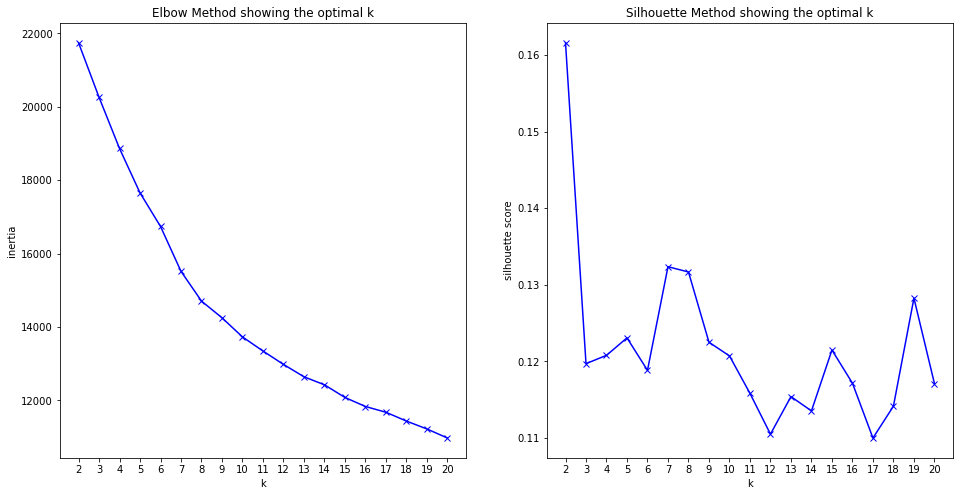

In [28]:
if ( os.path.isdir("models") == False ):
    os.mkdir("models")

K = range(2, 21)

inertia = []
silhouette = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234,
                    verbose=1)
    kmeans.fit(X_scaled_df)
    
    filename = r"C:\Users\31612\Documents\IRONHACK\6Week_six\lab-web-scraping-single-page\models\kmeans_" + str(k) + ".pickle" # Path with filename
    with open(filename, "wb") as file:
        pickle.dump(kmeans,file)

    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X_scaled_df, kmeans.predict(X_scaled_df)))


import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,2,figsize=(16,8))
ax[0].plot(K, inertia, 'bx-')
ax[0].set_xlabel('k')
ax[0].set_ylabel('inertia')
ax[0].set_xticks(np.arange(min(K), max(K)+1, 1.0))
ax[0].set_title('Elbow Method showing the optimal k')
ax[1].plot(K, silhouette, 'bx-')
ax[1].set_xlabel('k')
ax[1].set_ylabel('silhouette score')
ax[1].set_xticks(np.arange(min(K), max(K)+1, 1.0))
ax[1].set_title('Silhouette Method showing the optimal k')

## Predicting with the best model


In [36]:
best_model = load("models/kmeans_17.pickle")
best_model

KMeans(n_clusters=17, random_state=1234, verbose=1)

In [37]:
clusters = best_model.predict(X_scaled_df)

In [38]:
pd.Series(clusters).value_counts().sort_index()

0      67
1     164
2      39
3     202
4     116
5      84
6     180
7     116
8      80
9     158
10     47
11     12
12      6
13    173
14    171
15    156
16    177
dtype: int64

In [39]:
X["cluster"] = clusters
X.head()

,song_id,title,artist,dataset,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature,cluster
0,4LRPiXqCikLlN15c3yImP7,As It Was,Harry Styles,H,0.520,0.731,6,-5.338,0,0.0557,0.3420,0.001010,0.3110,0.662,173.930,audio_features,spotify:track:4LRPiXqCikLlN15c3yImP7,https://api.spotify.com/v1/tracks/4LRPiXqCikLl...,https://api.spotify.com/v1/audio-analysis/4LRP...,167303,4,9
1,1rDQ4oMwGJI7B4tovsBOxc,First Class,Jack Harlow,H,0.905,0.563,8,-6.135,1,0.1020,0.0254,0.000010,0.1130,0.324,106.998,audio_features,spotify:track:1rDQ4oMwGJI7B4tovsBOxc,https://api.spotify.com/v1/tracks/1rDQ4oMwGJI7...,https://api.spotify.com/v1/audio-analysis/1rDQ...,173948,4,1
2,1PckUlxKqWQs3RlWXVBLw3,About Damn Time,Lizzo,H,0.836,0.743,10,-6.305,0,0.0656,0.0995,0.000000,0.3350,0.722,108.966,audio_features,spotify:track:1PckUlxKqWQs3RlWXVBLw3,https://api.spotify.com/v1/tracks/1PckUlxKqWQs...,https://api.spotify.com/v1/audio-analysis/1Pck...,191822,4,15
3,3USxtqRwSYz57Ewm6wWRMp,Heat Waves,Glass Animals,H,0.761,0.525,11,-6.900,1,0.0944,0.4400,0.000007,0.0921,0.531,80.870,audio_features,spotify:track:3USxtqRwSYz57Ewm6wWRMp,https://api.spotify.com/v1/tracks/3USxtqRwSYz5...,https://api.spotify.com/v1/audio-analysis/3USx...,238805,4,1
4,6Zu3aw7FfjAF9WA0fA81Oq,Big Energy,Latto,H,0.935,0.807,11,-3.838,0,0.1140,0.0514,0.000000,0.3490,0.813,106.017,audio_features,spotify:track:6Zu3aw7FfjAF9WA0fA81Oq,https://api.spotify.com/v1/tracks/6Zu3aw7FfjAF...,https://api.spotify.com/v1/audio-analysis/6Zu3...,173182,4,15


In [41]:
X.to_csv('X.csv', index=False)

In [40]:
X[X['cluster'] == 9].sample(15)

,song_id,title,artist,dataset,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature,cluster
26,4k3lPl8YTKuY8c1HelVnm3,'Til You Can't,Cody Johnson,H,0.501,0.815,1,-4.865,1,0.0436,0.05130,0.000000,0.1060,0.460,160.087,audio_features,spotify:track:4k3lPl8YTKuY8c1HelVnm3,https://api.spotify.com/v1/tracks/4k3lPl8YTKuY...,https://api.spotify.com/v1/audio-analysis/4k3l...,224213,4,9
1215,0QeI79sp1vS8L3JgpEO7mD,Let's Go Crazy,Prince,NH,0.309,0.930,11,-6.399,1,0.1250,0.01920,0.002200,0.1060,0.376,195.815,audio_features,spotify:track:0QeI79sp1vS8L3JgpEO7mD,https://api.spotify.com/v1/tracks/0QeI79sp1vS8...,https://api.spotify.com/v1/audio-analysis/0QeI...,280000,4,9
895,6yLIqXX9edg1x0HZS7cZEv,The Air That I Breathe - 2008 Remaster,The Hollies,NH,0.279,0.473,4,-8.375,0,0.0309,0.24200,0.001640,0.1580,0.246,167.792,audio_features,spotify:track:6yLIqXX9edg1x0HZS7cZEv,https://api.spotify.com/v1/tracks/6yLIqXX9edg1...,https://api.spotify.com/v1/audio-analysis/6yLI...,257107,4,9
1259,0deI3lZkgbVt6wRsv5s0Ev,Out In The Fields,Gary Moore,NH,0.439,0.947,2,-8.189,0,0.0627,0.02750,0.005790,0.3940,0.359,179.997,audio_features,spotify:track:0deI3lZkgbVt6wRsv5s0Ev,https://api.spotify.com/v1/tracks/0deI3lZkgbVt...,https://api.spotify.com/v1/audio-analysis/0deI...,257707,4,9
1383,1VsGYaCBFjCVudtX9IGqDg,Have I Told You Lately,Van Morrison,NH,0.329,0.477,4,-10.266,1,0.0340,0.27600,0.013900,0.1360,0.182,143.532,audio_features,spotify:track:1VsGYaCBFjCVudtX9IGqDg,https://api.spotify.com/v1/tracks/1VsGYaCBFjCV...,https://api.spotify.com/v1/audio-analysis/1VsG...,260387,4,9
189,3qaSqrrevBrb84xl5JlptU,Dakota,Stereophonics,NH,0.506,0.930,4,-3.499,1,0.0675,0.12900,0.006820,0.0931,0.305,146.994,audio_features,spotify:track:3qaSqrrevBrb84xl5JlptU,https://api.spotify.com/v1/tracks/3qaSqrrevBrb...,https://api.spotify.com/v1/audio-analysis/3qaS...,297427,4,9
266,1TF8mSG5YHyaS4o3NeBSAo,Munich,Editors,NH,0.173,0.872,7,-4.390,0,0.0533,0.00052,0.035300,0.3240,0.390,149.361,audio_features,spotify:track:1TF8mSG5YHyaS4o3NeBSAo,https://api.spotify.com/v1/tracks/1TF8mSG5YHya...,https://api.spotify.com/v1/audio-analysis/1TF8...,226427,4,9
1143,2aZsp1KAJLMOaW2socza14,Kristallnaach,BAP,NH,0.346,0.572,9,-13.598,1,0.1180,0.48700,0.000000,0.0575,0.439,159.476,audio_features,spotify:track:2aZsp1KAJLMOaW2socza14,https://api.spotify.com/v1/tracks/2aZsp1KAJLMO...,https://api.spotify.com/v1/audio-analysis/2aZs...,299000,4,9
1178,27DEhFC0G2olRFgCTksnfw,Nur geträumt,Nena,NH,0.544,0.797,7,-8.502,1,0.0309,0.07180,0.000002,0.0785,0.885,177.188,audio_features,spotify:track:27DEhFC0G2olRFgCTksnfw,https://api.spotify.com/v1/tracks/27DEhFC0G2ol...,https://api.spotify.com/v1/audio-analysis/27DE...,220173,4,9
980,08GOw3NsrJ0LsCCeyqzt3b,Thank You For The Music,ABBA,NH,0.283,0.417,4,-9.124,1,0.0404,0.83500,0.000000,0.1020,0.373,201.145,audio_features,spotify:track:08GOw3NsrJ0LsCCeyqzt3b,https://api.spotify.com/v1/tracks/08GOw3NsrJ0L...,https://api.spotify.com/v1/audio-analysis/08GO...,229453,4,9


## Loading the scaler and the best model

In [29]:
def load(filename = "filename.pickle"): 
    try: 
        with open(filename, "rb") as file: 
            return pickle.load(file) 
    except FileNotFoundError: 
        print("File not found!") 

In [ ]:
scaler2 = load("/content/drive/MyDrive/scaler.pickle")
scaler2

In [ ]:
best_model = load("/content/drive/MyDrive/kmeans_9.pickle")

In [ ]:
#X[(X['dataset'] == "N") & (X['cluster'] == user_cluster)].sample() dataset== H or NH - cluster==assigned cluster